<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/Rainfall_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9ba10a3fff2b9c3804f5f3963a262c978ebbfea44844bfeb16a3cbc51f6aea1d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


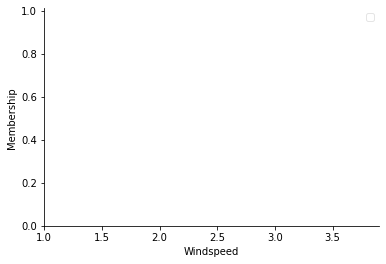

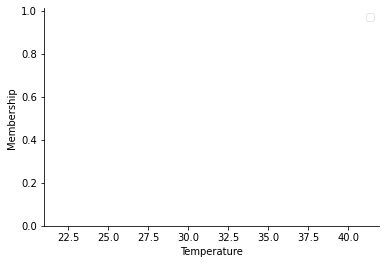

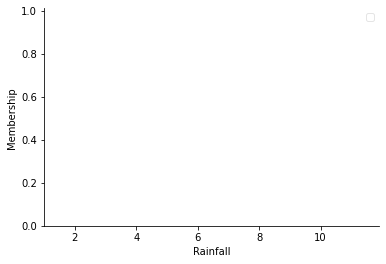

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Windspeed = ctrl.Antecedent(np.arange(1,4,0.1),'Windspeed')
Temperature = ctrl.Antecedent(np.arange(21,42,0.1),'Temperature')
Rainfall = ctrl.Consequent(np.arange(1,12,0.1),'Rainfall')
Windspeed.view()
Temperature.view()
Rainfall.view()

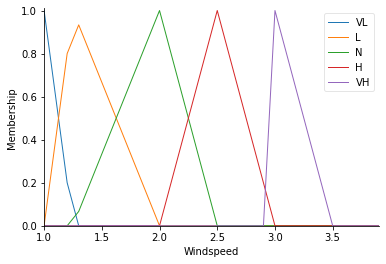

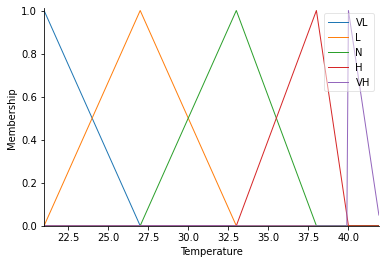

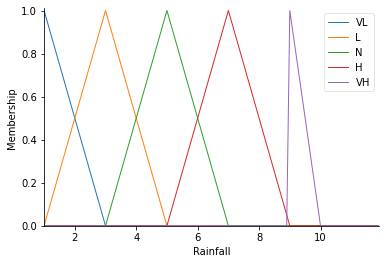

In [42]:
Windspeed['VL'] = fuzz.trimf(Windspeed.universe,[1,1,1.25])
Windspeed['L'] = fuzz.trimf(Windspeed.universe,[1,1.25,2])
Windspeed['N'] = fuzz.trimf(Windspeed.universe,[1.25,2,2.5])
Windspeed['H'] = fuzz.trimf(Windspeed.universe,[2,2.5,3])
Windspeed['VH'] = fuzz.trimf(Windspeed.universe,[3,3,3.5])

Temperature['VL'] = fuzz.trimf(Temperature.universe,[21,21,27])
Temperature['L'] = fuzz.trimf(Temperature.universe,[21,27,33])
Temperature['N'] = fuzz.trimf(Temperature.universe,[27,33,38])
Temperature['H'] = fuzz.trimf(Temperature.universe,[33,38,40])
Temperature['VH'] = fuzz.trimf(Temperature.universe,[40,40,42])

Rainfall['VL'] = fuzz.trimf(Rainfall.universe,[1,1,3])
Rainfall['L'] = fuzz.trimf(Rainfall.universe,[1,3,5])
Rainfall['N'] = fuzz.trimf(Rainfall.universe,[3,5,7])
Rainfall['H'] = fuzz.trimf(Rainfall.universe,[5,7,9])
Rainfall['VH'] = fuzz.trimf(Rainfall.universe,[9,9,10])

Windspeed.view()
Temperature.view()
Rainfall.view()

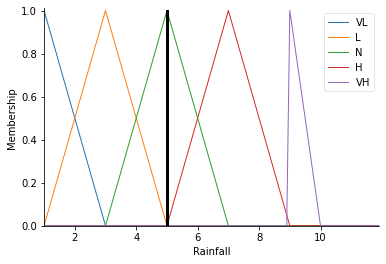

In [48]:
rule1 = ctrl.Rule(Windspeed['VL'] & Temperature['VL'], Rainfall['VL'])
rule2 = ctrl.Rule(Windspeed['L'] & Temperature['L'], Rainfall['VL'])
rule3 = ctrl.Rule(Windspeed['N'] & Temperature['N'], Rainfall['L'])
rule4 = ctrl.Rule(Windspeed['H'] & Temperature['H'], Rainfall['N'])
rule5 = ctrl.Rule(Windspeed['VH'] & Temperature['VH'], Rainfall['H'])
rule6 = ctrl.Rule(Windspeed['VL'] & Temperature['VL'], Rainfall['VL'])
rule7 = ctrl.Rule(Windspeed['L'] & Temperature['L'], Rainfall['L'])
rule8 = ctrl.Rule(Windspeed['N'] & Temperature['N'], Rainfall['L'])
rule9 = ctrl.Rule(Windspeed['H'] & Temperature['H'], Rainfall['N'])
rule10 = ctrl.Rule(Windspeed['VH'] & Temperature['VH'], Rainfall['H'])
rule11 = ctrl.Rule(Windspeed['VL'] & Temperature['VL'], Rainfall['L'])
rule12 = ctrl.Rule(Windspeed['L'] & Temperature['L'], Rainfall['L'])
rule13 = ctrl.Rule(Windspeed['N'] & Temperature['N'], Rainfall['N'])
rule14 = ctrl.Rule(Windspeed['H'] & Temperature['H'], Rainfall['H'])
rule15 = ctrl.Rule(Windspeed['VH'] & Temperature['VH'], Rainfall['VH'])
rule16 = ctrl.Rule(Windspeed['VL'] & Temperature['VL'], Rainfall['L'])
rule17 = ctrl.Rule(Windspeed['L'] & Temperature['L'], Rainfall['N'])
rule18 = ctrl.Rule(Windspeed['N'] & Temperature['N'], Rainfall['H'])
rule19 = ctrl.Rule(Windspeed['H'] & Temperature['H'], Rainfall['H'])
rule20 = ctrl.Rule(Windspeed['VH'] & Temperature['VH'], Rainfall['VH'])
rule21 = ctrl.Rule(Windspeed['VL'] & Temperature['VL'], Rainfall['N'])
rule22 = ctrl.Rule(Windspeed['L'] & Temperature['L'], Rainfall['N'])
rule23 = ctrl.Rule(Windspeed['N'] & Temperature['N'], Rainfall['H'])
rule24 = ctrl.Rule(Windspeed['H'] & Temperature['H'], Rainfall['VH'])
rule25 = ctrl.Rule(Windspeed['VH'] & Temperature['VH'], Rainfall['VH'])


Rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
Rainfalling = ctrl.ControlSystemSimulation(Rainfalling_ctrl)
Rainfalling.input['Windspeed'] = 3
Rainfalling.input['Temperature'] = 40
Rainfalling.compute()
Rainfall.view(sim = Rainfalling)